In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

## Data Set 1: Height

In [2]:
heights=pd.read_csv("heights.csv")

In [3]:
heights.sample(3)

,name,height
12,yoseph,6.0
16,donald,7.1
0,mohan,1.2


In [4]:
heights.shape

(20, 2)

In [5]:
heights.describe().T

,count,mean,std,min,25%,50%,75%,max
height,20.0,8.39,8.782812,1.2,5.35,5.7,6.275,40.2


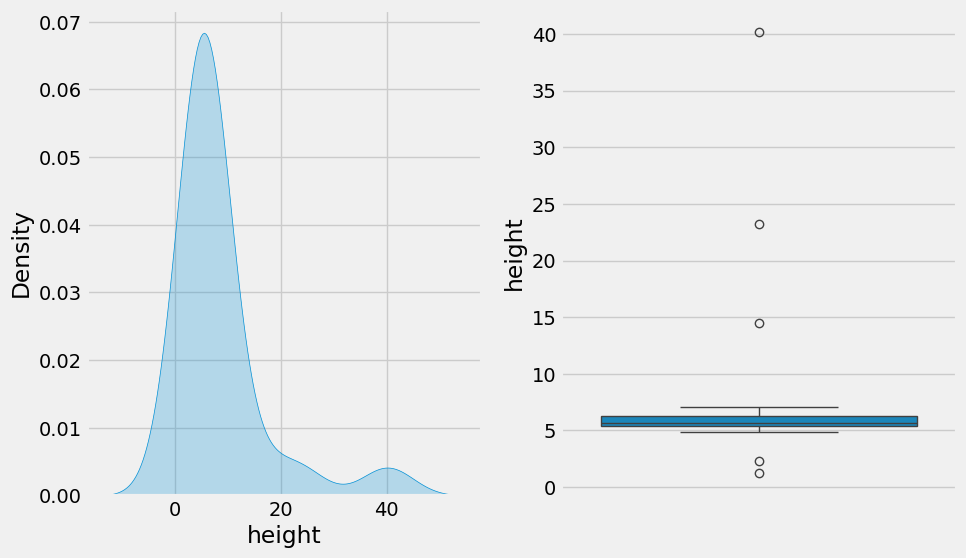

In [6]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))

sns.kdeplot(data=heights,x='height',fill=True,ax=ax[0])
sns.boxplot(data=heights,y='height',ax=ax[1])

plt.show()

In [7]:
heights['height'].skew()

3.0004072544994194

# Percentile Method

In [8]:
min_threshold, max_threshold = heights['height'].quantile([0.05, 0.95])
min_threshold, max_threshold

(2.245, 24.05000000000001)

### Removing the values:

In [9]:
heights[(heights['height']>max_threshold) | (heights['height']<min_threshold)]

,name,height
0,mohan,1.2
19,Liu,40.2


In [10]:
removed_df1=heights[(heights['height']<=max_threshold) & (heights['height']>=min_threshold)]
removed_df1.shape

(18, 2)

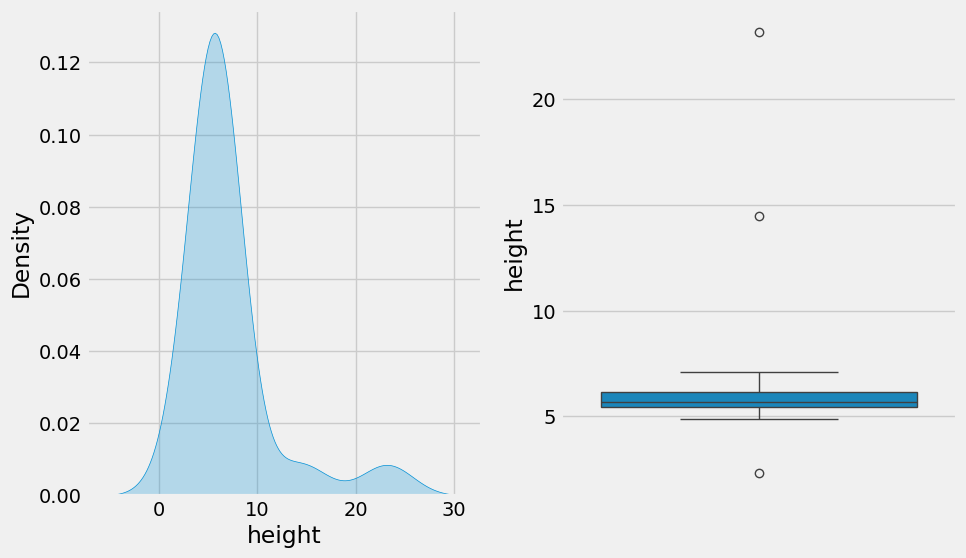

In [11]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))

sns.kdeplot(data=removed_df1,x='height',fill=True,ax=ax[0])
sns.boxplot(data=removed_df1,y='height',ax=ax[1])

plt.show()

### Capping the values:

In [13]:
capped_df1=heights['height'].clip(lower=min_threshold,upper=max_threshold)
capped_df1=pd.DataFrame(capped_df1)
capped_df1.describe()

,height
count,20.000000
mean,7.634750
std,5.954363
min,2.245000
25%,5.350000
50%,5.700000
75%,6.275000
max,24.050000


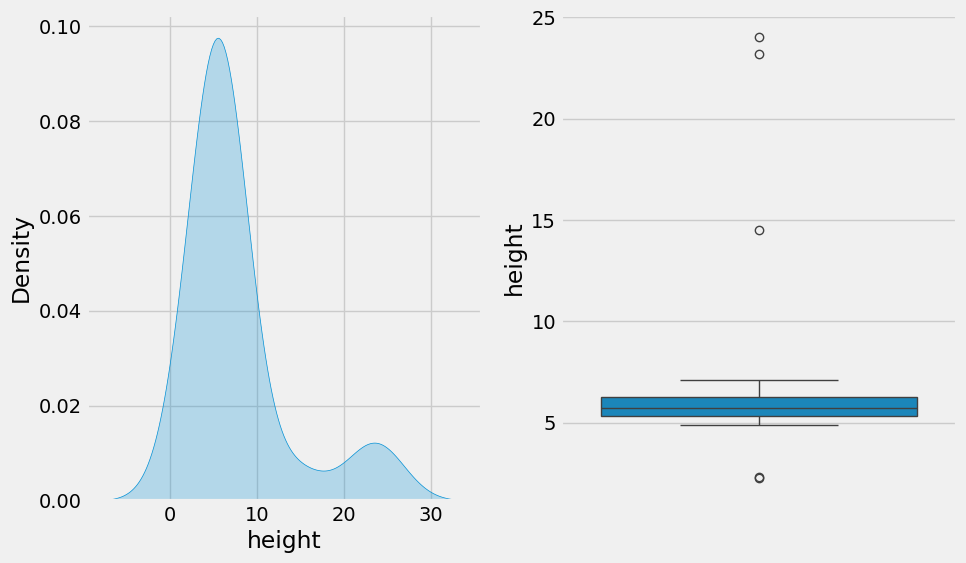

In [14]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))

sns.kdeplot(data=capped_df1,x='height',fill=True,ax=ax[0])
sns.boxplot(data=capped_df1,y='height',ax=ax[1])

plt.show()

## Dataset 2: Price

In [15]:
price=pd.read_csv("bhp.csv")

In [16]:
price.shape

(13200, 7)

In [17]:
price.sample(4)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4019,other,7 BHK,600.0,4.0,100.0,7,16666
696,Hennur Road,3 Bedroom,2264.0,3.0,159.0,3,7022
13123,Doddathoguru,3 BHK,1783.0,3.0,85.0,3,4767
4028,Jigani,3 BHK,1252.0,3.0,61.0,3,4872


In [18]:
price.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13200.0,1555.302783,1237.323445,1.0,1100.0,1275.00,1672.0,52272.0
bath,13200.0,2.691136,1.338915,1.0,2.0,2.00,3.0,40.0
price,13200.0,112.276178,149.175995,8.0,50.0,71.85,120.0,3600.0
bhk,13200.0,2.800833,1.292843,1.0,2.0,3.00,3.0,43.0
price_per_sqft,13200.0,7920.336742,106727.160328,267.0,4267.0,5438.00,7317.0,12000000.0


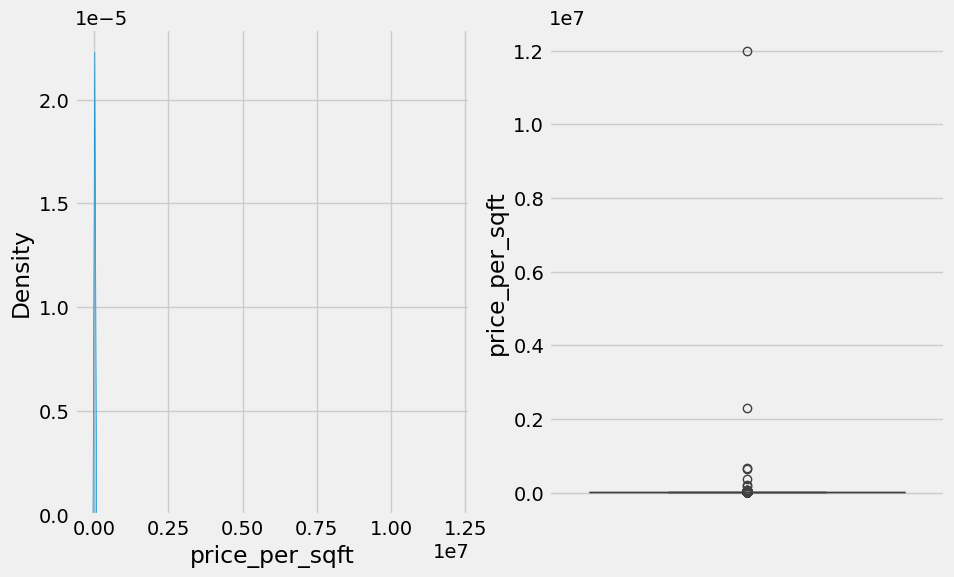

In [20]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))

sns.kdeplot(data=price,x='price_per_sqft',fill=True,ax=ax[0])
sns.boxplot(data=price,y='price_per_sqft',ax=ax[1])

plt.show()

In [19]:
price['price_per_sqft'].skew()

108.28105529705168

In [27]:
min_threshold, max_threshold = price['price_per_sqft'].quantile([0.02, 0.98])
min_threshold, max_threshold

(2799.98, 20000.0)

In [28]:
new_df2=price[(price['price_per_sqft']<=max_threshold) & (price['price_per_sqft']>=min_threshold)]

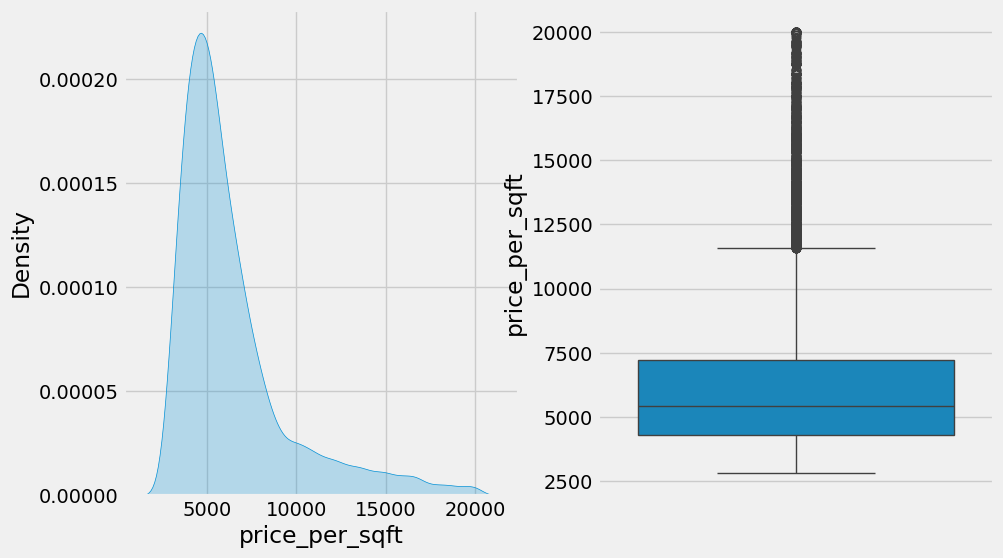

In [29]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))

sns.kdeplot(data=new_df2,x='price_per_sqft',fill=True,ax=ax[0])
sns.boxplot(data=new_df2,y='price_per_sqft',ax=ax[1])

plt.show()

In [31]:
new_df2['price_per_sqft'].skew()

1.8673486833722952

**Important Points**
1. We can use the percentile method to detect the outliers. Once we find a suitable percentile through trial and error or by analyzing the data distribution, we can just remove it or cap (Winsorization Technique) it.
2. Winsorization preserves most of the data structure but slightly affects the distribution tails. As extreme values are capped, the min and max values may repeat, causing a small peak at the ends.
3. It's common to experiment with 1st/99th, 5th/95th, or 10th/90th depending on how extreme and influential the outliers are.Visual tools like boxplots or histograms can help guide this decision.
4. Use removal if the dataset is large and losing a few data points won’t hurt. Use Winsorization when you want to retain all rows for modeling (e.g., in ML) but reduce the impact of extreme values.
5. The idea of percentile is to remove some extreme values. Say if 95 is the highest marks then it is the 100% and 0 if is the lowest is the 0 percentile, meaning no one scored more than 100 or less than 0. A value of 95 percentile means that only 5% of the total sample lies above the 95% threshold.